In [ ]:
import torch
import numpy as np
from torchvision import datasets # Import the necessary libraries from the torchvision package
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
## Download the MNIST training dataset if it's not already present in the specified root directory.
# Convert the images to PyTorch tensors for further processing.
train_data = datasets.MNIST(
    root="data",    # Directory where the data will be stored
    train=True,     # Specifies that this is the training set
    download=True,  # Downloads the data if it's not already present
    transform=ToTensor()  # Converts the images to PyTorch tensors
)

test_data = datasets.MNIST(
    root="data",
    train=False,     # Specifies that this is the test set
    download=True,
    transform=ToTensor()
)

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
train_data.targets.size()

torch.Size([60000])

In [ ]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
from torch.utils.data import DataLoader

loaders = {
    'train':DataLoader(train_data,
                       batch_size = 100,
                       shuffle=True,
                       num_workers =1),

    'test':DataLoader(test_data,
                       batch_size = 500,
                       shuffle=False,
                       num_workers =1),
}

In [ ]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7ec5607dfe20>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7ec560867a90>}

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return F.softmax(x)
    #return F.log_softmax(x, dim=1)

In [ ]:
from typing import ItemsView
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
        print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += loss_fn(output,target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')


In [ ]:
for epoch in range(1,11):
  train(epoch)
  test()

<ipython-input-36-da28291b5edc>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0.000000%)]	2.302649
Train Epoch: 1 [2000/60000 (3.333333%)]	2.287220
Train Epoch: 1 [4000/60000 (6.666667%)]	2.147398
Train Epoch: 1 [6000/60000 (10.000000%)]	2.058741
Train Epoch: 1 [8000/60000 (13.333333%)]	1.877689
Train Epoch: 1 [10000/60000 (16.666667%)]	1.801319
Train Epoch: 1 [12000/60000 (20.000000%)]	1.822429
Train Epoch: 1 [14000/60000 (23.333333%)]	1.737651
Train Epoch: 1 [16000/60000 (26.666667%)]	1.694881
Train Epoch: 1 [18000/60000 (30.000000%)]	1.720263
Train Epoch: 1 [20000/60000 (33.333333%)]	1.698982
Train Epoch: 1 [22000/60000 (36.666667%)]	1.696465
Train Epoch: 1 [24000/60000 (40.000000%)]	1.735418
Train Epoch: 1 [26000/60000 (43.333333%)]	1.679265
Train Epoch: 1 [28000/60000 (46.666667%)]	1.643119
Train Epoch: 1 [30000/60000 (50.000000%)]	1.632842
Train Epoch: 1 [32000/60000 (53.333333%)]	1.605285
Train Epoch: 1 [34000/60000 (56.666667%)]	1.603880
Train Epoch: 1 [36000/60000 (60.000000%)]	1.584444
Train Epoch: 1 [38000/60000 (63.333333%)]	

In [ ]:
device

device(type='cuda')

Prediction: 3


<ipython-input-36-da28291b5edc>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


<function matplotlib.pyplot.show(close=None, block=None)>

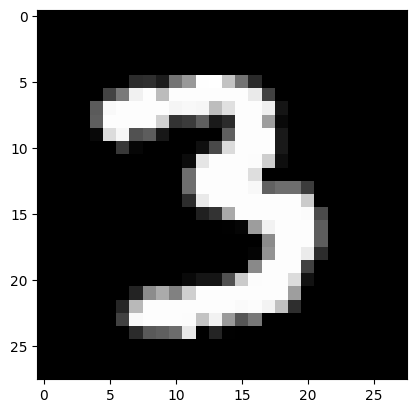

In [ ]:
model.eval()

data, target = test_data[500]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show